# What is NLTK?
- Natural Language Tool Kit
- Developed by Steven Bird and Edward Loper at the University of Pennsylvania in 2001
- Suite of libraries for *natural language processing* (NLP), primarily text analysis
- Includes 10 gigabytes of *corpora* (collections of written text) and tools such as parsers, tokenizers, stemmers, lemmatizers, regular expression processors, etc
- Documentation can be found at *http://www.nltk.org/*
- Examples inspired by *https://likegeeks.com/nlp-tutorial-using-python-nltk/* and taken from *http://www.nltk.org/*
- Data scraped from *http://twinearth.net/wk/doku.php/home*

## What is NLP?
- NLP is the ability for computers to understand, interpret, and manipulate human language
- NLP is a component of *artificial intelligence* (AI)
- A combination of many fields including: linguistics, computer science, AI, and congnitive science
- Tasks include: syntactic and semantic parsing, text mining, and sentiment analysis
- Applications include: webpage indexing by search engines, topic modeling, spam email filtering, and automatic voice transcription
- It is estimated that 80% of all data is unstructured with the majority of this being text

# NLP as a tool for the indexing of webpages by search engines

### Scraping Dr. Maier's website
- Requests package for retrieving html
- BeautifulSoup for parsing html

In [48]:
import requests
from bs4 import BeautifulSoup

target_url = 'http://twinearth.net/wk/doku.php/home'
response = requests.post(target_url)
soup = BeautifulSoup(response.text, "html5lib") 

divs = soup.div.div.find_all('div')

name = (divs[9].find_all('h3'))[0].string

list_of_destinations = []
list_of_links = []

links = divs[9].find_all('li')
for i in range(5):
    list_of_links.append(links[i].a.get("href"))
    list_of_destinations.append(links[i].span.string)
    
paragraphs = soup.body.find_all('p')[:2]

for p in paragraphs:
    links = p.find_all('a')
    for i in links:
        list_of_destinations.append(i.get_text())
        list_of_links.append(i.get('href'))

### Text pulled from html

In [65]:
raw_text = paragraphs[0].get_text() + paragraphs[1].get_text()
print (name)
print(raw_text)

Frederick Maier

I am the Associate Director of and an Assistant Research Scientist at UGA's Institute for Artificial Intelligence. Before that, I was a Lecturer in UGA's Computer Science Department.  I've also been a research fellow at Aston Business School in Birmingham, England, a postdoc at the Florida Institute for Human and Machine Cognition and a visiting researcher in the Kno.e.sis Center of Wright State University. 

My research is in logic and artificial intelligence, particularly knowledge representation and nonclassical (nonmonotonic and paraconistent) reasoning.  I have a PhD in computer science and a master's degree in artificial intelligence, both from UGA. Before computer science and artificial intelligence, I studied philosophy at Tulane University in New Orleans.



### Scraped links that could be followed in order to extract more text and links

In [50]:
for destination, link in zip (list_of_destinations,list_of_links):
    print(destination,':',link)

Home : http://twinearth.net/wk/doku.php/home
Curriculum Vitae : http://twinearth.net/wk/doku.php/cv
Teaching : http://twinearth.net/wk/doku.php/teaching
Contact : http://twinearth.net/wk/doku.php/contact
UGA AI Institute : http://www.ai.uga.edu
Institute for Artificial Intelligence : http://ai.uga.edu
Computer Science Department : http://www.cs.uga.edu/
Aston Business School : http://www.aston.ac.uk
Florida Institute for Human and Machine Cognition : http://www.ihmc.us/
Kno.e.sis Center : http://knoesis.wright.edu/
Wright State University : http://www.wright.edu/
computer science : http://www.cs.uga.edu/
artificial intelligence : http://www.ai.uga.edu/
Tulane University : http://www.tulane.edu/~phil/


## Tokenization
- The segmentation of a paragraph into sentences or a sentence into words
- Tokenize into sentences: *nltk.tokenize.sent_tokenize(*text*)*
- Tokenize into words: *nltk.tokenize.word_tokenize(*text*)*

In [51]:
import nltk
from nltk.tokenize import sent_tokenize

#tokenize paragraph into sentences
for i in sent_tokenize(raw_text):
    print (i,'\n')


I am the Associate Director of and an Assistant Research Scientist at UGA's Institute for Artificial Intelligence. 

Before that, I was a Lecturer in UGA's Computer Science Department. 

I've also been a research fellow at Aston Business School in Birmingham, England, a postdoc at the Florida Institute for Human and Machine Cognition and a visiting researcher in the Kno.e.sis Center of Wright State University. 

My research is in logic and artificial intelligence, particularly knowledge representation and nonclassical (nonmonotonic and paraconistent) reasoning. 

I have a PhD in computer science and a master's degree in artificial intelligence, both from UGA. 

Before computer science and artificial intelligence, I studied philosophy at Tulane University in New Orleans. 



In [52]:
from nltk.tokenize import word_tokenize

#tokenize the first sentence into words
print(word_tokenize(sent_tokenize(raw_text)[0]))

['I', 'am', 'the', 'Associate', 'Director', 'of', 'and', 'an', 'Assistant', 'Research', 'Scientist', 'at', 'UGA', "'s", 'Institute', 'for', 'Artificial', 'Intelligence', '.']


## Web page indexing

### Tokenize the unprocessed text and get frequency counts for each token
- Calculate frequecy distribution of tokens: *nltk.FreqDist(*tokens*)*

In [53]:
tokens = [token for token in raw_text.split()]
frequencies = nltk.FreqDist(tokens)
for key,val in frequencies.items():
    print(str(key) + ':' + str(val))

I:4
am:1
the:3
Associate:1
Director:1
of:2
and:8
an:1
Assistant:1
Research:1
Scientist:1
at:4
UGA's:2
Institute:2
for:2
Artificial:1
Intelligence.:1
Before:2
that,:1
was:1
a:6
Lecturer:1
in:7
Computer:1
Science:1
Department.:1
I've:1
also:1
been:1
research:2
fellow:1
Aston:1
Business:1
School:1
Birmingham,:1
England,:1
postdoc:1
Florida:1
Human:1
Machine:1
Cognition:1
visiting:1
researcher:1
Kno.e.sis:1
Center:1
Wright:1
State:1
University.:1
My:1
is:1
logic:1
artificial:3
intelligence,:3
particularly:1
knowledge:1
representation:1
nonclassical:1
(nonmonotonic:1
paraconistent):1
reasoning.:1
have:1
PhD:1
computer:2
science:2
master's:1
degree:1
both:1
from:1
UGA.:1
studied:1
philosophy:1
Tulane:1
University:1
New:1
Orleans.:1


### Ten most frequent tokens in the text

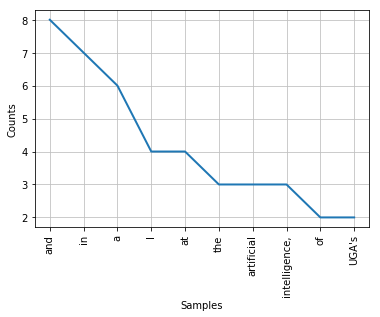

In [54]:
import matplotlib.pyplot as plt

frequencies.plot(10)

### Preprocess the data
- make all words lowercase
- remove punctuation
- remove words of length less than 3
- remove words in NLTK stop word corpus
- used for search engine indexing and improving Naive Bayes classification

### Stop words
- Words with little semantic weight
- *nltk.corpus.stopwords()*

In [55]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))
stops.add("'s")
stops.add("'ve")
print(stops)

{'d', 'itself', 'for', 't', "you've", "doesn't", 'doing', 'nor', 'my', "wasn't", 'did', 'both', 'in', "aren't", 'doesn', 'before', 'down', 'had', 're', 'while', 'are', 'all', "shan't", 'than', 'against', 'been', 'because', 'after', 'that', 'at', "shouldn't", 'himself', 'so', 'when', 'hers', 've', "weren't", 'just', 'where', 'under', 'not', 'weren', 'once', 'its', 'was', "it's", 'why', 'by', 'each', 's', "that'll", 'a', 'of', 'such', "she's", 'herself', 'or', 'out', 'their', 'but', 'o', 'haven', 'other', 'ours', 'about', 'wouldn', 'own', 'your', 'over', 'above', 'then', 'who', 'again', "don't", 'needn', 'through', 'off', 'i', "you'll", 'here', 'now', "mustn't", 'too', 'with', "hadn't", 'there', 'him', 'some', 'if', 'won', 'those', "needn't", 'no', 'further', 'hasn', 'during', 'her', 'is', 'mightn', "haven't", 'mustn', 'whom', "wouldn't", "isn't", "won't", 'yourselves', 'theirs', 'does', 'same', 'which', 'can', 'you', 'his', "couldn't", 'themselves', 'me', 'only', 'y', 'don', 'how', 'sha

In [56]:
#preprocessing data

import re

#removing punctuation
processed_text = re.sub('[!@#$(),.]', '', raw_text)

#make all tokens lower case
processed_text = processed_text.lower()

#remove words of 3 chars or less
processed_text = ' '.join(word for word in processed_text.split() if len(word) >=3)
    
#tokenize the summary (turn it into a set) and remove all elements in stop words set
tokenized = word_tokenize(processed_text)
processed_text = [word for word in tokenized if not word in stops]

#turn list back into a string
processed_text = ' '.join(processed_text)

### Unedited versus preprocessed text

In [57]:
#unedited text
print (raw_text,"\n")

#edited text
print(processed_text)


I am the Associate Director of and an Assistant Research Scientist at UGA's Institute for Artificial Intelligence. Before that, I was a Lecturer in UGA's Computer Science Department.  I've also been a research fellow at Aston Business School in Birmingham, England, a postdoc at the Florida Institute for Human and Machine Cognition and a visiting researcher in the Kno.e.sis Center of Wright State University. 

My research is in logic and artificial intelligence, particularly knowledge representation and nonclassical (nonmonotonic and paraconistent) reasoning.  I have a PhD in computer science and a master's degree in artificial intelligence, both from UGA. Before computer science and artificial intelligence, I studied philosophy at Tulane University in New Orleans.
 

associate director assistant research scientist uga institute artificial intelligence lecturer uga computer science department also research fellow aston business school birmingham england postdoc florida institute human 

### Tokenize the preprocessed text and get frequency counts for each token

In [64]:
tokens = [token for token in processed_text.split()]
frequencies = nltk.FreqDist(tokens)
for key,val in frequencies.items():
    print(str(key) + ':' + str(val))

associate:1
director:1
assistant:1
research:3
scientist:1
uga:3
institute:2
artificial:4
intelligence:4
lecturer:1
computer:3
science:3
department:1
also:1
fellow:1
aston:1
business:1
school:1
birmingham:1
england:1
postdoc:1
florida:1
human:1
machine:1
cognition:1
visiting:1
researcher:1
knoesis:1
center:1
wright:1
state:1
university:2
logic:1
particularly:1
knowledge:1
representation:1
nonclassical:1
nonmonotonic:1
paraconistent:1
reasoning:1
phd:1
master:1
degree:1
studied:1
philosophy:1
tulane:1
new:1
orleans:1


### Ten most frequent tokens in the preprocessed text

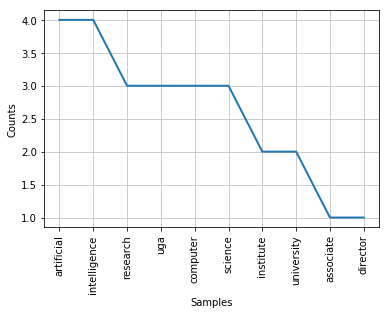

In [59]:
frequencies.plot(10)

### Word stemming
- Reduces inflectional occurences and "condenses" context bearing tokens in a text, i.e. removing affixes and returning just the root word
- Most common algorithm is the Porter stemmer
- *nltk.stem.PorterStemmer()*
- Used for search engine page indexing and for improving Naive Bayes classification

In [60]:
from nltk.stem import PorterStemmer

#instantiate a porter stemmer object
stemmer = PorterStemmer()

In [61]:
#stemming a single word
print(stemmer.stem("working"))
print(stemmer.stem("works"))

work
work


In [62]:
#stemming an entire sentence

sentence = (sent_tokenize(raw_text)[0])
print(sentence,"\n")

#tokenize the sentence
tokenized = word_tokenize(sentence)    

#empty list for storing stemmed tokens from the sentence
tokens = []
for word in tokenized:
    tokens.append(stemmer.stem(word))
#join tokens back into string
stemmed_sentence = ' '.join(tokens)

print(stemmed_sentence)


I am the Associate Director of and an Assistant Research Scientist at UGA's Institute for Artificial Intelligence. 

I am the associ director of and an assist research scientist at uga 's institut for artifici intellig .


### Lemmatization
- *nltk.stem.WordNetLemmatizer()*
- A similar process to stemming, but the product is always a real word which is not always the case for stemming
- However, it takes longer and may return a synonym instead of a root

In [63]:
from nltk.stem import WordNetLemmatizer

#e.g. 
print(stemmer.stem("increases"))

lemmatizer = WordNetLemmatizer()
print (lemmatizer.lemmatize('increases'))

increas
increase
